Author: Nik Alleyne <br>
Author Blog: https://www.securitynik.com <br>
Author GitHub:github.com/securitynik <br>
Author Books: [  <br>
                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/",  <br>
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" <br>
            ] <br>

## 14. Beginning Deep Learning, - Linear Regression, Tensorflow

This post is part of my beginning machine learning series.  <br>
The series includes the following: <br>

01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning, - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning, - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning, - Classification, Tensorflow <br>
17 - Beginning Deep Learning, - Classification, Pytorch <br>
18 - Beginning Deep Learning, - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning, - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning, - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
23 - Beginning Model TFServing <br>

But conn.log is not the only file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

24 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
25 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
26 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 26 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

In [1]:
# Let's import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
# This is the data we previously saved from the Pandas notebook
#   04 - Beginning Pandas <br>
df_conn = pd.read_csv(r'df_conn_cleaned.csv', index_col=0)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,127.0.0.1,27762,127.0.0.1,58552,0.000000,0,0,0,0,0,0
1,10.0.0.4,27761,10.0.0.4,48798,0.000000,0,0,0,0,0,0
2,10.0.0.4,27761,10.0.0.4,48804,0.000000,0,0,0,0,0,0
3,127.0.0.1,27762,127.0.0.1,58568,0.000000,0,0,0,0,0,0
4,10.0.0.4,48786,10.0.0.4,27761,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4430183,10.0.0.21,55757,10.0.0.4,9200,0.000051,0,0,1,52,1,40
4430184,10.0.0.4,37236,10.0.0.4,9200,0.000023,0,0,0,0,1,40
4430185,10.0.0.4,37244,10.0.0.4,9200,0.000005,0,0,0,0,1,40
4430186,10.0.0.4,37246,10.0.0.4,9200,0.000005,0,0,0,0,1,40


This file represents Zeek (formerly Bro) connection log - conn.log`. <br>
Zeek is a framework used for Network Security Monitoring.  <br>
This entire series is based on using Zeek's data.  <br>
The majority of the notebooks use the conn.log <br>
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html


In [3]:
# Looking at above, we see a number of records with 0s. 
# These will add no value to our learning process
# I know you might be saying, why didn't we fix these earlier. 
# Good question, we are learning (pun intended) as we go along
# Besides you learn more about your data as you work with your data
# Or as it is said, if you interrogate the data long enough, it will confess
#   https://quoteinvestigator.com/2021/01/18/confess/
# Let's find all those records and drop them
# Reference: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
df_conn = df_conn.drop(df_conn[(df_conn.duration == 0 ) & (df_conn.orig_bytes == 0 ) 
                               & (df_conn.resp_bytes == 0 ) & (df_conn.orig_pkts == 0 )  
                               & (df_conn.orig_ip_bytes == 0 ) & (df_conn.resp_pkts == 0 ) 
                               & (df_conn.resp_ip_bytes == 0 )].index)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
5,10.0.0.10,52824,89.187.183.77,8888,0.053276,208,976,6,528,6,1296
6,10.0.0.10,52826,89.187.183.77,8888,0.383646,227,692369,202,10739,117,240893
7,10.0.0.10,52828,89.187.183.77,8888,0.054294,208,977,6,528,6,1297
8,10.0.0.10,52830,89.187.183.77,8888,0.424980,227,791633,176,9387,174,367737
9,10.0.0.10,52832,89.187.183.77,8888,0.272567,227,406607,171,9127,71,169939
...,...,...,...,...,...,...,...,...,...,...,...
4430183,10.0.0.21,55757,10.0.0.4,9200,0.000051,0,0,1,52,1,40
4430184,10.0.0.4,37236,10.0.0.4,9200,0.000023,0,0,0,0,1,40
4430185,10.0.0.4,37244,10.0.0.4,9200,0.000005,0,0,0,0,1,40
4430186,10.0.0.4,37246,10.0.0.4,9200,0.000005,0,0,0,0,1,40


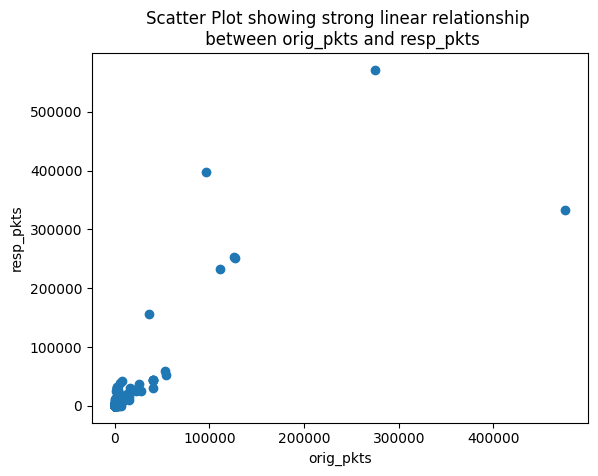

In [4]:
# Confirming the positive correlation
# We can see from below, generally, as x increases, y increases
# and as y increases, x increases. 
# Hence our strong positive correlation.
# What we need is a line that best fits this data
# Meaning, we need a m and b for y = mx + b
# The question is which line works best?
plt.title('Scatter Plot showing strong linear relationship \n between orig_pkts and resp_pkts')
plt.scatter(df_conn['orig_pkts'], df_conn['resp_pkts'])
plt.xlabel('orig_pkts')
plt.ylabel('resp_pkts')
plt.show()

In [5]:
# Further confirming the positive linear correlation
df_conn.orig_pkts.corr(other=df_conn.resp_pkts, method='pearson')

0.8400252261323242

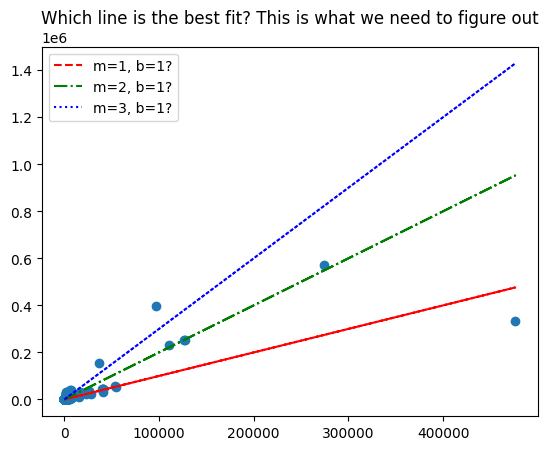

In [6]:
# Trying to figure out which line best fits our data
# As in which one will produce the smallest error
plt.title('Which line is the best fit? This is what we need to figure out')
plt.scatter(df_conn['orig_pkts'], df_conn['resp_pkts'])
plt.plot(df_conn.orig_pkts, (1 * df_conn.orig_pkts) + 1, label='m=1, b=1?', c='r', linestyle='--' )
plt.plot(df_conn.orig_pkts, (2 * df_conn.orig_pkts) + 1, label='m=2, b=1?', c='g', linestyle='dashdot' )
plt.plot(df_conn.orig_pkts, (3 * df_conn.orig_pkts) + 1, label='m=3, b=1?', c='b', linestyle='dotted' )
plt.legend(loc='best')


In [7]:
# Setup our x and y
X = df_conn['orig_pkts'].values.astype(np.float32).reshape(-1,1)
y = df_conn['resp_pkts'].values.astype(np.float32).reshape(-1,1)

# Get a view of teh data
X[:5], y[:5]

(array([[  6.],
        [202.],
        [  6.],
        [176.],
        [171.]], dtype=float32),
 array([[  6.],
        [117.],
        [  6.],
        [174.],
        [ 71.]], dtype=float32))

In [8]:
# Import the scaler to scale the data
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Setup the scaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))

# Fit on the normal data
min_max_scaler.fit(X)

# Transform the normal data
X_scaled = min_max_scaler.transform(X)
X_scaled

array([[1.2604194e-05],
       [4.2434121e-04],
       [1.2604194e-05],
       ...,
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)

In [10]:
# Because we learned about Linear Regression in 
#   11. Beginning Linear Regression - Machine Learning
# I will jump straight into the deep learning part of Linear Regression

In [11]:
# Import the tensorflow library
import tensorflow as tf

In [39]:
# Set the random initializer
tf.keras.utils.set_random_seed(seed=10)

# Setup the model
tf_linear_model = tf.keras.Sequential(name='Linear_Model')

# Add the input layer
tf_linear_model.add(tf.keras.layers.Input(shape=(1,), name='linear_input'))

# Add a hidden layer with 4 neurons
# Set the initial weights to 1. This is just to add predictability to the process
tf_linear_model.add(tf.keras.layers.Dense(units=4, activation='relu', use_bias=True, \
                                       bias_initializer='uniform', kernel_initializer='uniform', name='first_hidden'))

# Add a second layer with 4 neurons
tf_linear_model.add(tf.keras.layers.Dense(units=4, activation='relu', use_bias=True, name='second_hidden'))

# Add an output layer with a linear activation
# For the activation, we can use "linear" or "None"
tf_linear_model.add(tf.keras.layers.Dense(units=1, activation=None, use_bias=True, name='output'))

# Get the model summary
tf_linear_model.summary()

Model: "Linear_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden (Dense)        (None, 4)                 8         
                                                                 
 second_hidden (Dense)       (None, 4)                 20        
                                                                 
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


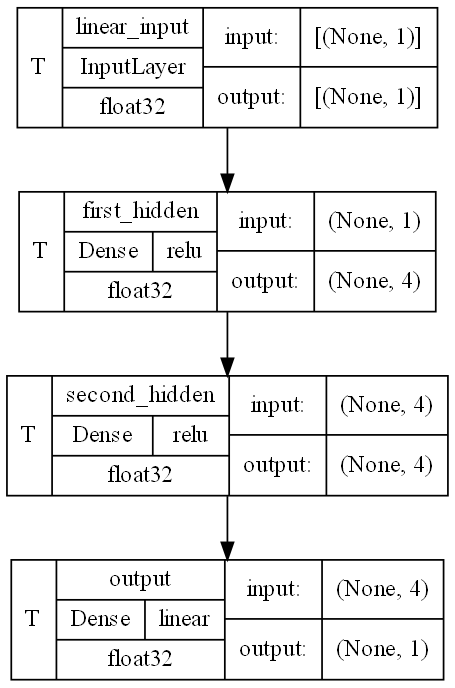

In [40]:
# Plot the model
tf.keras.utils.plot_model(model=tf_linear_model, show_dtype=True, \
                          show_layer_activations=True, show_layer_names=True, \
                            show_shapes=True, show_trainable=True, dpi=125)

In [41]:
# Compile the model
tf_linear_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1.), loss='mse', metrics=['mse'])

In [43]:
# Get a look at the initial model parameters - weights and biases
tf_linear_model.weights

[<tf.Variable 'first_hidden/kernel:0' shape=(1, 4) dtype=float32, numpy=
 array([[ 0.03344658, -0.04626584,  0.04169953,  0.00088676]],
       dtype=float32)>,
 <tf.Variable 'first_hidden/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.01429936,  0.04281589, -0.02518441,  0.02398555], dtype=float32)>,
 <tf.Variable 'second_hidden/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.460133  , -0.7975978 ,  0.50310034, -0.07811278],
        [-0.12394953,  0.28122252, -0.7833656 , -0.20277548],
        [ 0.8457337 , -0.26346862,  0.57096547, -0.6855525 ],
        [-0.2742322 ,  0.04558653,  0.4078533 , -0.7413307 ]],
       dtype=float32)>,
 <tf.Variable 'second_hidden/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'output/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[-0.410034  ],
        [ 0.98067117],
        [ 0.9586289 ],
        [ 0.42435002]], dtype=float32)>,
 <tf.Variable 'output/bias:0' shape=(1,) dtype=float32, numpy

In [44]:
# Before training the model, split the data into train and test set
# import the train test split library
from sklearn.model_selection import train_test_split

In [45]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, \
                                                    train_size=0.8, random_state=10, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((167988, 1), (41998, 1), (167988, 1), (41998, 1))

In [46]:
# Above, we wanted to know which line fits best.
# Let's see what type of line we get without the model being trained
# https://www.tensorflow.org/api_docs/python/tf/linspace
# https://www.tensorflow.org/tutorials/keras/regression

# Create a function to plot the regression line
def plot_regression_line(model=tf_linear_model, epochs=0):
    ''' Plots the regression line '''
    x_line = np.linspace(start=0., stop=1, num=100, axis=0).reshape(-1,1)
    y = model.predict(x_line)

    plt.title(f'Model after {epochs} epochs')
    plt.scatter(x=X_train, y=y_train, label='train data points')
    plt.plot(x_line, y, color='red', linestyle='--', label='regression line')
    plt.legend(loc='best')

4/4 [==============================] - 0s 3ms/step


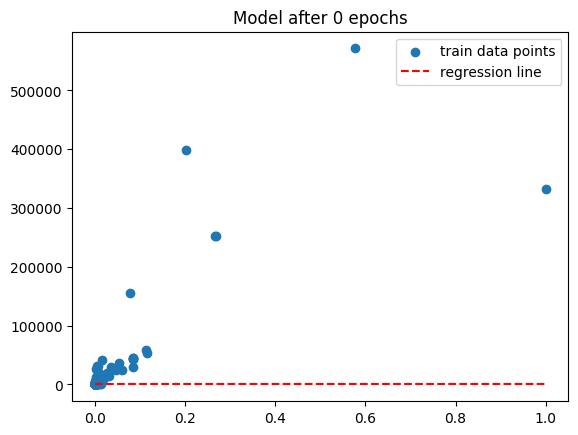

In [47]:
# What does the regression line of the untrained model look like?
plot_regression_line()

In [48]:
# Ohhh la la. What a terrible line
# Make prediction on the x_train samples before training the model
# We should not be expecting anything meaningful here.
# Just wanted to show you could predicted on the untrained model
untrained_preds = tf_linear_model.predict(X_train)
untrained_preds

5250/5250 [==============================] - 7s 1ms/step


array([[0.00169557],
       [0.00169508],
       [0.00169557],
       ...,
       [0.00169557],
       [0.00169524],
       [0.00169524]], dtype=float32)

In [49]:
# Get the untrained model's r2 score
from sklearn.metrics import r2_score

In [50]:
# The r2 with a value of 1, means the model is perfect
# r2 of 0 means the model is not doing better than average
# r2 of less than 0 means the model is terrible
# This score suggest this model is terrible. 
# Then again, we knew this from looking at the plot above
r2_score(y_true=y_train, y_pred=untrained_preds)

-0.0005885517705492838

In [51]:
# Train the model and specify a validation data - the test data.
# Realistically, I should use validation_split and keep the training data isolated,
# However, for this learning process, there is no harm in my approach.
# Additionally, I should set 'shuffle=False' so I can see how close we can get to the predictions in the PyTorch notebook
#   15 - Beginning Deep Learning, - Linear Regression, PyTorch <br>
# Then again, we should not be surprised that we more than likely will not get close to the PyTorch value.
# Primary reason being, the weights are different at initialization
# Let's see how it goes
history = tf_linear_model.fit(x=X_train, y=y_train, epochs=50, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/50
5250/5250 [==============================] - 13s 2ms/step - loss: 4466322.0000 - mse: 4466322.0000 - val_loss: 652435.2500 - val_mse: 652435.2500
Epoch 2/50
5250/5250 [==============================] - 17s 3ms/step - loss: 11614170.0000 - mse: 11614170.0000 - val_loss: 1472128.3750 - val_mse: 1472128.3750
Epoch 3/50
5250/5250 [==============================] - 24s 5ms/step - loss: 5096596.5000 - mse: 5096596.5000 - val_loss: 1472097.2500 - val_mse: 1472097.2500
Epoch 4/50
5250/5250 [==============================] - 21s 4ms/step - loss: 3890056.2500 - mse: 3890056.2500 - val_loss: 1472123.0000 - val_mse: 1472123.0000
Epoch 5/50
5250/5250 [==============================] - 13s 3ms/step - loss: 2203165.2500 - mse: 2203165.2500 - val_loss: 1472173.2500 - val_mse: 1472173.2500
Epoch 6/50
5250/5250 [==============================] - 13s 2ms/step - loss: 10376548.0000 - mse: 10376548.0000 - val_loss: 1472457.7500 - val_mse: 1472457.7500
Epoch 7/50
5250/5250 [======================

4/4 [==============================] - 0s 3ms/step


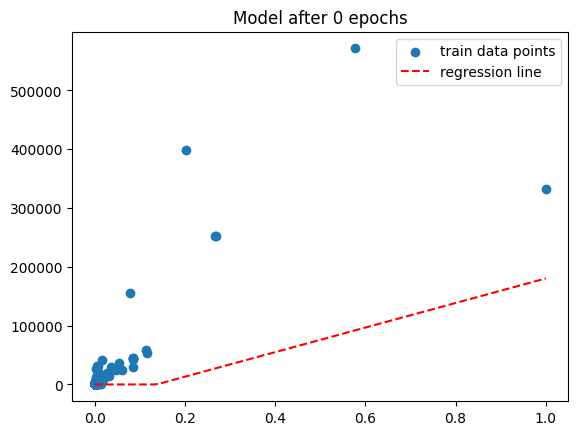

In [52]:
# What does our line look like after 50 epochs?
plot_regression_line()

In [53]:
# Interesting ...
# After 50 epochs, we are looking not as good as we did in the PyTorch notebook
#   15 - Beginning Deep Learning, - Linear Regression, PyTorch <br>
# Just beware that initialization of your model parameters is a very important topic
#   https://www.deeplearning.ai/ai-notes/initialization/index.html
#   https://www.deeplearning.ai/ai-notes/optimization/index.html
#   https://arxiv.org/pdf/1502.01852.pdf
#   https://oceanumeric.github.io/blog/initialization-and-optimization
#   https://towardsdatascience.com/the-importance-and-reasoning-behind-initialisation-829d8f6e9f43
#   https://cedar.buffalo.edu/~srihari/CSE676/8.4%20ParInitializn.pdf
#   https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/
#   
#   Also we did do much better than our untrained model. That is expected.
# Let's train again this time for 100 epochs
history = tf_linear_model.fit(x=X_train, y=y_train, epochs=100, verbose=1, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/100
5250/5250 [==============================] - 14s 3ms/step - loss: 1319599.7500 - mse: 1319599.7500 - val_loss: 363924.9375 - val_mse: 363924.9375
Epoch 2/100
5250/5250 [==============================] - 20s 4ms/step - loss: 7029384.0000 - mse: 7029384.0000 - val_loss: 567280.4375 - val_mse: 567280.4375
Epoch 3/100
5250/5250 [==============================] - 23s 4ms/step - loss: 3788793.0000 - mse: 3788793.0000 - val_loss: 306944.6562 - val_mse: 306944.6562
Epoch 4/100
5250/5250 [==============================] - 25s 5ms/step - loss: 4362247.5000 - mse: 4362247.5000 - val_loss: 436466.1562 - val_mse: 436466.1562
Epoch 5/100
5250/5250 [==============================] - 19s 4ms/step - loss: 3957774.2500 - mse: 3957774.2500 - val_loss: 358611.2188 - val_mse: 358611.2188
Epoch 6/100
5250/5250 [==============================] - 21s 4ms/step - loss: 4165772.0000 - mse: 4165772.0000 - val_loss: 377230.8750 - val_mse: 377230.8750
Epoch 7/100
5250/5250 [=============================

4/4 [==============================] - 0s 3ms/step


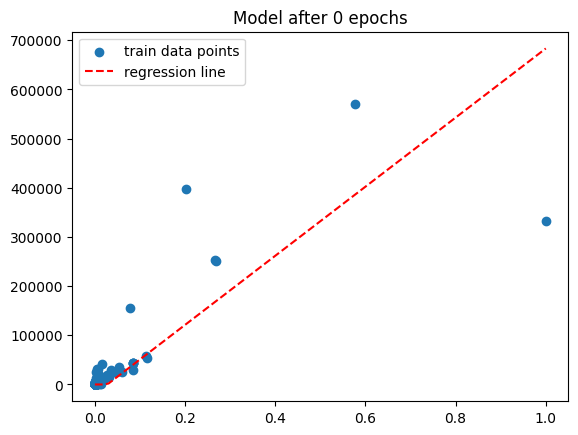

In [54]:
# Has the training improved after 100 epochs?
plot_regression_line()

In [55]:
# After 100 epochs, we have what seems to be a good model so far.
# We can train more but in the interest of time, I will close it off here
# Visualizing the model's performance
# Grabbing the keys from the history callback
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

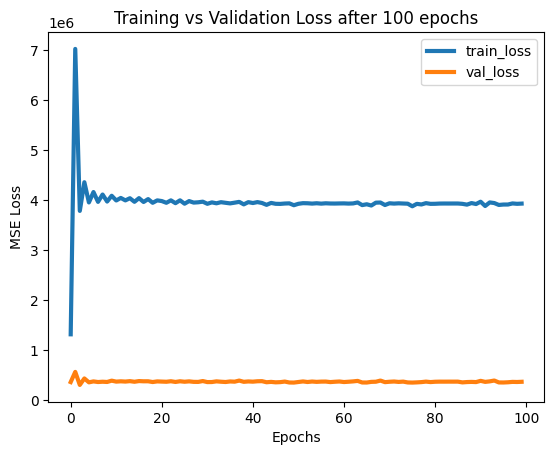

In [57]:
# Plotting the training loss values
plt.title('Training vs Validation Loss after 100 epochs')
plt.plot(history.history['loss'], lw=3, label='train_loss')
plt.plot(history.history['val_loss'], lw=3, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

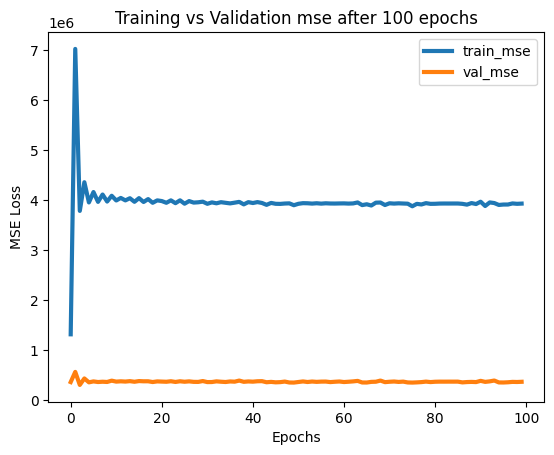

In [58]:
# Plotting the validation loss values
plt.title('Training vs Validation mse after 100 epochs')
plt.plot(history.history['mse'], lw=3, label='train_mse')
plt.plot(history.history['val_mse'], lw=3, label='val_mse')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

In [59]:
# Make and store some predictions on the training data
train_preds = tf_linear_model.predict(X_train)
train_preds

5250/5250 [==============================] - 8s 1ms/step


array([[44.799297],
       [44.799297],
       [44.799297],
       ...,
       [44.799297],
       [44.799297],
       [44.799297]], dtype=float32)

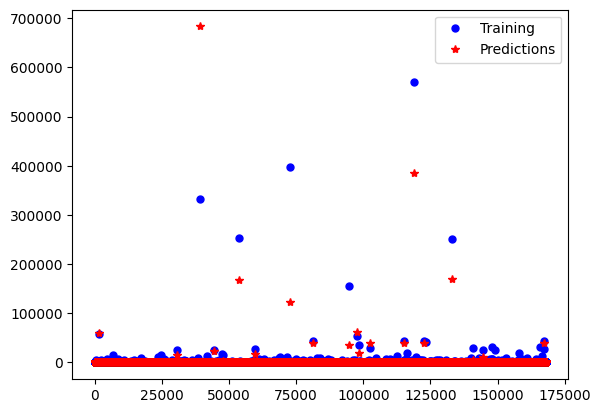

In [60]:
# With the trained model. Plot the training data
# Plotting the train predictions vs actual values, shows that the model does not seem to be doing too bad
plt.plot(y_train, linestyle='', marker='o', c='b', markersize=5, label='Training')

# Plot the predicted data
plt.plot(train_preds, linestyle='', marker='*', c='r', label='Predictions')
plt.legend()
plt.show()

In [61]:
# Quite a few of the predictions seems to fall inline with the original values
# However, see some predicted values that are definitely different from the original values
# Looking at the learned parameters - weights and biases
tf_linear_model.weights

[<tf.Variable 'first_hidden/kernel:0' shape=(1, 4) dtype=float32, numpy=
 array([[ -5.9717765,  -2.4690368, -17.426922 , 211.66621  ]],
       dtype=float32)>,
 <tf.Variable 'first_hidden/bias:0' shape=(4,) dtype=float32, numpy=array([ -5.9911647, -51.32028  , -17.493807 ,  -5.768824 ], dtype=float32)>,
 <tf.Variable 'second_hidden/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ -0.460133  ,   5.207854  ,   0.50310034,  -0.07811278],
        [ -0.12394953, -15.155113  ,  -0.7833656 ,  -0.20277548],
        [  0.8457337 ,  17.205156  ,   0.57096547,  -0.6855525 ],
        [ -0.2742322 ,  58.279903  , -29.00838   ,  -0.7413307 ]],
       dtype=float32)>,
 <tf.Variable 'second_hidden/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.       , -3.5242538, -9.202654 ,  0.       ], dtype=float32)>,
 <tf.Variable 'output/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[-0.410034  ],
        [56.962803  ],
        [14.669596  ],
        [ 0.42435002]], dtype=float32)>,
 <tf.Variable

In [62]:
# Make a prediction on a single item
# Setup the sample
new_sample = np.array([1500], dtype=np.float32, ndmin=2)
new_sample

array([[1500.]], dtype=float32)

In [63]:
# Remember, all data on which prediction needs to be made,
# Has to go through the same preprocessing steps before making prediction
# Scaling the data
new_sample_scaled = min_max_scaler.transform(X=new_sample)
new_sample_scaled


array([[0.00315105]], dtype=float32)

In [64]:
# Make the prediction on the scaled data
tf_linear_model.predict(new_sample_scaled)

1/1 [==============================] - 0s 43ms/step


array([[44.799297]], dtype=float32)

In [65]:
# We did a prediction on a sample data point
# How are we doing with the test data
# Making predictions on the test data
test_preds = tf_linear_model.predict(X_test)
test_preds

1313/1313 [==============================] - 2s 2ms/step


array([[44.799297],
       [44.799297],
       [44.799297],
       ...,
       [44.799297],
       [44.799297],
       [44.799297]], dtype=float32)

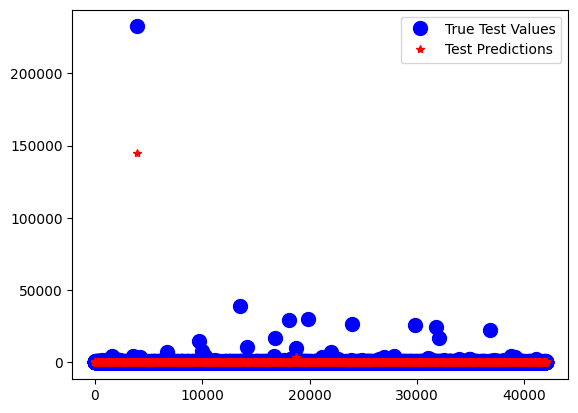

In [66]:
# With the trained model. Plot the test data
# Below seems to suggest the model is not doing too bad, when comparing the true y with the predicted y (y_hat)
plt.plot(y_test, linestyle='', marker='o', c='b', markersize=10, label='True Test Values')

# Plot the predicted data
plt.plot(test_preds, linestyle='', marker='*', c='r', label='Test Predictions')
plt.legend()
plt.show()

4/4 [==============================] - 0s 3ms/step


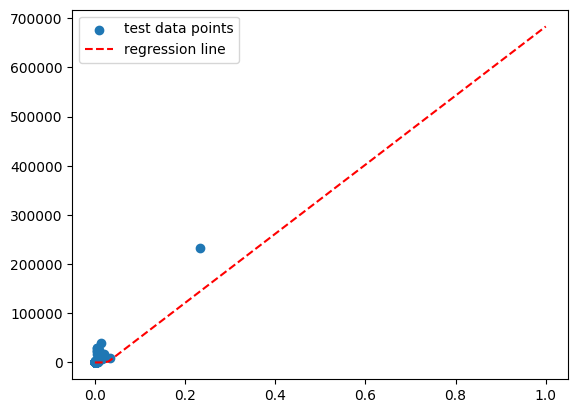

In [67]:
# What does our line look like on the test data
x_line = np.linspace(start=0., stop=1, num=100, axis=0).reshape(-1,1)
y = tf_linear_model.predict(x_line)
plt.scatter(x=X_test, y=y_test, label='test data points')
plt.plot(x_line, y, color='red', linestyle='--', label='regression line')
plt.legend(loc='best')


In [68]:
# Make and store some predictions again, using the trained model
train_preds = tf_linear_model.predict(X_train)
train_preds

5250/5250 [==============================] - 7s 1ms/step


array([[44.799297],
       [44.799297],
       [44.799297],
       ...,
       [44.799297],
       [44.799297],
       [44.799297]], dtype=float32)

In [69]:
# Revisit the r2 for the train data
# The score below suggest our model is ok!
r2_score(y_true=y_train, y_pred=train_preds)

0.644897187680388

In [70]:
# Make and store the test data predictions
test_preds = tf_linear_model.predict(X_test)
test_preds[:10]

1313/1313 [==============================] - 2s 1ms/step


array([[44.799297],
       [44.799297],
       [44.799297],
       [44.799297],
       [44.799297],
       [44.799297],
       [44.799297],
       [44.799297],
       [44.799297],
       [44.799297]], dtype=float32)

In [71]:
# Get the r2 on the test data
# The model is doing better on the test data than train data
# I think so. What do you think?
# Interesting ...
r2_score(y_true=y_test, y_pred=test_preds)

0.748948025763982

In [72]:
# Looks like we can save this model at this time
# importing the the os library
import os

In [73]:
# Create the location to save the model
PATH = './SAVED_MODELS/LR_TF/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

In [74]:
# Save the model
tf.keras.models.save_model(model=tf_linear_model, filepath=f'{PATH}tf_linear_reg.tf')

INFO:tensorflow:Assets written to: ./SAVED_MODELS/LR_TF/tf_linear_reg.tf\assets


INFO:tensorflow:Assets written to: ./SAVED_MODELS/LR_TF/tf_linear_reg.tf\assets


In [75]:
# With the model saved, time to reload and make predictions
loaded_tf_lr_model = tf.keras.models.load_model(filepath=f'{PATH}tf_linear_reg.tf')
loaded_tf_lr_model

In [76]:
# Make predictions on the loaded model
loaded_tf_lr_model.predict(new_sample_scaled)

1/1 [==============================] - 0s 96ms/step


array([[44.799297]], dtype=float32)

In [77]:
# Time to move on